In [3]:
# Using kaggle's SMS Spam Classifier Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

In [5]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [7]:
data = data[['target', 'text']]

In [8]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data['target'] = data['target'].map({'ham': 0, 'spam': 1})

In [10]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Pratham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pratham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
ps = PorterStemmer()
stopwords_set = set(stopwords.words('english'))

In [13]:
def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = nltk.word_tokenize(text)  # Tokenization
    words = [word for word in words if word.isalpha()]  # Remove non-alphabetic words
    words = [word for word in words if word not in stopwords_set]  # Remove stopwords
    words = [ps.stem(word) for word in words]  # Stemming
    return ' '.join(words)

In [14]:
data['transformed_text'] = data['text'].apply(transform_text)

In [15]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['transformed_text']).toarray()
y = data['target'].values

In [16]:
print('Before SMOTE:', Counter(y))
smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)
print('After SMOTE:', Counter(y_resampled))

Before SMOTE: Counter({0: 4825, 1: 747})
After SMOTE: Counter({0: 4825, 1: 4825})


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)

In [18]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_pred = nb_classifier.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.48%


In [21]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1448
           1       0.97      0.98      0.97      1447

    accuracy                           0.97      2895
   macro avg       0.97      0.97      0.97      2895
weighted avg       0.97      0.97      0.97      2895



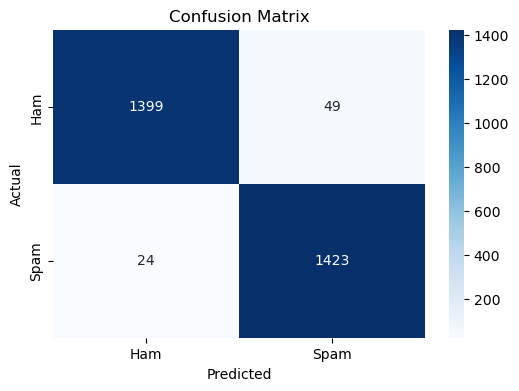

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
import pickle
pickle.dump(nb_classifier, open('Models/spam_classifier.pkl', 'wb'))

In [25]:
pickle.dump(tfidf, open('Models/Vectorizer.pkl', 'wb'))